<a href="https://colab.research.google.com/github/Zhaoxin-Hu/ECE222A/blob/master/Homework%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3

In [0]:
import matplotlib
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
np.set_printoptions(suppress=True)
from scipy import integrate
from scipy.signal import argrelextrema

## Problem 2

Define unnormalized and normalized pattern function <br/>
- unnormalized: $P_{un}(\theta,\phi) = \sum_nI_ne^{jn\psi}$ <br/>
- normalized: $P_n(\theta,\phi) = \frac{P_{un}}{P_{un,max}}$

In [0]:
num_pts_theta = 1000
num_pts_phi = 100
theta, phi = np.linspace(0, np.pi, num_pts_theta), np.linspace(0, 2*np.pi, num_pts_phi)
theta2d, phi2d = np.meshgrid(theta, phi)
theta2d, phi2d = np.transpose(theta2d), np.transpose(phi2d)
Nz = 16
k = 2*np.pi
dz = 0.5
az = 0 # -np.sqrt(2)/2*np.pi

In [0]:
# unnormalized array factor for array on z-axis
def AFz_un(theta, phi):
    AF = 0
    atten_dB = 0
    atten = 10**(atten_dB/20)
    psi = k*dz*np.cos(theta)+az
    for n in np.arange(Nz):
        An = (1-atten)*(np.cos(n/15*np.pi-np.pi/2))+atten
        AF = AF + An*np.exp(1j*n*psi)
    return np.abs(AF)**2
  
def integrand(theta, phi):
    return AFz_un(theta, phi)*np.sin(theta)

Compute 2d array factor

In [0]:
AFz_uni_un_max = max(AFz_un(theta, 0, 0))
AFz_uni_n = AFz_un(theta,0,0)/AFz_uni_un_max
AFz_uni_dB = 20*np.log10(AFz_uni_n)

atten_dB = -10
AFz_atten_un_max = max(AFz_un(theta, 0, atten_dB))
AFz_atten_n = AFz_un(theta,0,atten_dB)/AFz_atten_un_max
AFz_atten_dB = 20*np.log10(AFz_atten_n)

Compute HPBW and FNBW

In [89]:
ind1_uni, ind2_uni = np.where(AFz_uni_dB>-3)[0][0], np.where(AFz_uni_dB>-3)[0][-1]
HPBW_uni = (theta[ind2_uni] - theta[ind1_uni])/np.pi*180 # degrees
print('E-plane HPBW (uniform) = ', round(HPBW_uni,2))

ind1_atten, ind2_atten = np.where(AFz_atten_dB>-3)[0][0], np.where(AFz_atten_dB>-3)[0][-1]
HPBW_atten = (theta[ind2_atten] - theta[ind1_atten])/np.pi*180 # degrees
print('E-plane HPBW (',atten_dB, 'dB) = ', round(HPBW_atten,2))

broaden_factor = HPBW_atten/HPBW_uni
print('HPBW broadening factor = ', round(broaden_factor,2))

min_ind_uni = argrelextrema(AFz_uni_dB, np.less)[0]
print('null angles (uniform, deg) = ', theta[min_ind_uni]/np.pi*180)

min_ind_atten = argrelextrema(AFz_atten_dB, np.less)[0]
print('null angles (',atten_dB,'dB, deg) = ', theta[min_ind_atten]/np.pi*180)

E-plane HPBW (uniform) =  8.83
E-plane HPBW ( -10 dB) =  10.63
HPBW broadening factor =  1.2
null angles (uniform, deg) =  [ 16.75675676  33.69369369  54.41441441  62.88288288  70.63063063
  78.01801802  85.22522523  92.43243243  99.63963964 107.02702703
 114.77477477 122.88288288 131.89189189 142.52252252 156.57657658]
null angles ( -10 dB, deg) =  [ 11.17117117  29.54954955  57.11711712  64.32432432  71.53153153
  78.73873874  85.76576577  92.79279279  99.81981982 107.02702703
 114.59459459 122.52252252 131.35135135 141.44144144 154.41441441]


Compute directivity

In [97]:
beam_solid_angle = integrate.dblquad(integrand, 0, 2*np.pi, 0, np.pi)
print('beam solid angle = ', round(beam_solid_angle[0],2))
D = 4*np.pi/beam_solid_angle[0]
D_dB = 10*np.log10(D)
print('directivity = ', round(D,2))
print('directivity (dB) = ', round(D_dB,2))

TypeError: ignored

2d plotting

Text(0.5,0,'$\\theta$')

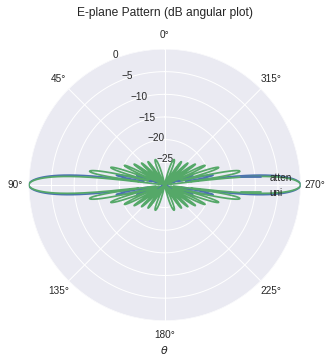

In [22]:
# plot pattern
plt.figure(figsize = (5,5))
ax = plt.subplot(111, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.plot(theta, AFz_atten_dB, label = 'atten')
ax.legend(loc="right") # loc="upper right"
ax.plot(theta, AFz_uni_dB, label = 'uni')
ax.legend(loc="right")
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Pattern (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

Text(0.5,1,'E-plane Pattern (linear rectangular plot)')

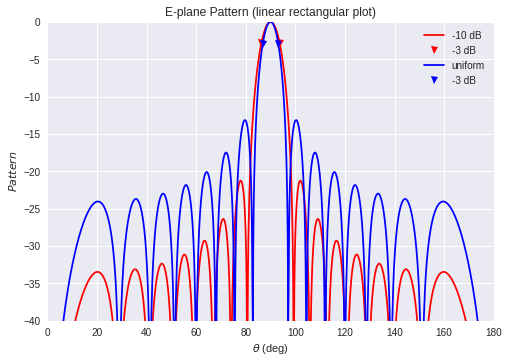

In [84]:
plt.plot(theta/np.pi*180, AFz_atten_dB, 'r', label = '-10 dB ')
plt.plot(theta[ind1_atten]/np.pi*180, AFz_atten_dB[ind1_atten], 'rv', label = '-3 dB')
plt.plot(theta[ind2_atten]/np.pi*180, AFz_atten_dB[ind2_atten], 'rv')

plt.plot(theta/np.pi*180, AFz_uni_dB, 'b', label = 'uniform')
plt.plot(theta[ind1_uni]/np.pi*180, AFz_uni_dB[ind1_uni], 'bv', label = '-3 dB')
plt.plot(theta[ind2_uni]/np.pi*180, AFz_uni_dB[ind2_uni], 'bv')
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel(r'$Pattern$')
plt.xlim(0,180)
plt.ylim(-40,0)
plt.legend()
plt.title(r"E-plane Pattern (linear rectangular plot)")

Compute 3d array factor and pattern

In [0]:
AFz_un_3d = AFz_un(theta2d,phi2d)
AFz_un_3d_max = np.max(np.max(AFz_un_3d))
AFz_n_3d = AFz_un_3d/AFz_un_3d_max
AFz_dB_3d = 20*np.log10(AFz_n_3d)
AFz_dB_2d = AFz_dB_3d[:,0]

In [0]:
offset = 30
R = AFz_dB_2d+offset
R[R<0] = 0;
X = R * np.sin(theta2d[:,0]) * np.cos(phi2d[:,0])
Y = R * np.sin(theta2d[:,0]) * np.sin(phi2d[:,0])
Z = R * np.cos(theta2d[:,0])
'''X = R * np.sin(theta2d) * np.cos(phi2d)
Y = R * np.sin(theta2d) * np.sin(phi2d)
Z = R * np.cos(theta2d)'''
X = np.reshape(X,(num_pts_theta,1))
Y = np.reshape(Y,(num_pts_theta,1))
Z = np.reshape(Z,(num_pts_theta,1))
print(X.shape)
print(Y.shape)
print(Z.shape)

(1000, 1)
(1000, 1)
(1000, 1)


Text(0.5,0,'$\\theta$')

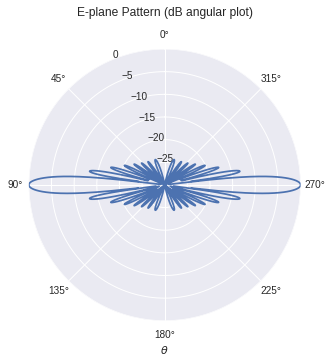

In [0]:
# plot pattern
plt.figure(figsize = (5,5))
ax = plt.subplot(111, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.plot(theta2d[:,0], AFz_dB_2d)
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Pattern (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

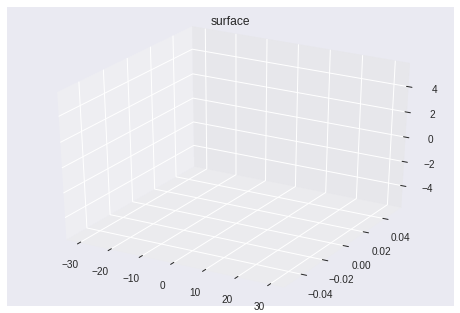

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, edgecolor='k', cmap = 'jet')
ax.set_title('surface')
plt.show()

3d plotting

In [0]:
R = AFz_dB_3d
X = R * np.sin(theta2d) * np.cos(phi2d)
Y = R * np.sin(theta2d) * np.sin(phi2d)
Z = R * np.cos(theta2d)

# fourth dimention - colormap
# create colormap according to R-value
'''color_dimension = R # change to desired fourth dimension
minn, maxx = color_dimension.min(), color_dimension.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='jet')
m.set_array([])
fcolors = m.to_rgba(color_dimension)'''

'''fig = plt.figure()
ax = fig.gca(projection='3d')
pattern = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx,
    shade=False, alpha=0.5, linewidth=0, antialiased=False)
fig.colorbar(pattern, shrink=0.5, aspect=5)
plt.show()'''
# cmap=plt.get_cmap('jet')

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1,
    linewidth=0, antialiased=False, alpha=0.5)
plt.show()

'''
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, shade=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.canvas.show()
'''

## Problem 2

In [5]:
n = np.arange(16)
atten_dB = -10 # dB
atten = 10**(atten_dB/20)
print(atten)
An = (1-atten)*(np.cos(n/15*np.pi-np.pi/2))+atten
print(An)

0.31622776601683794
[0.31622777 0.45839201 0.59434299 0.718139   0.82436956 0.90839189
 0.9665338  0.99625422 0.99625422 0.9665338  0.90839189 0.82436956
 0.718139   0.59434299 0.45839201 0.31622777]


In [0]:
plt.figure(figsize = (10,10))
ax = plt.subplot(221, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(np.sin(theta)**2))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Element Factor (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

ax = plt.subplot(222, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(AF_1(theta,np.pi/2)**2))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Array Factor (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$, 60$^\circ$ main beam')

ax = plt.subplot(223, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(AF_2(theta,np.pi/2)**2))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Array Factor (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$, 45$^\circ$ main beam')

ax = plt.subplot(224, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(AF_3(theta,np.pi/2)**2))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Array Factor (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$, 30$^\circ$ main beam')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


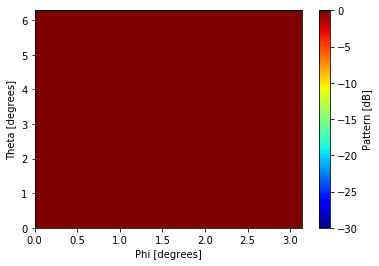

In [0]:
## Plot in 2D ##

theta, phi = np.linspace(0, 2 * np.pi, 40), np.linspace(0, np.pi, 40)
theta2d, phi2d = np.meshgrid(theta, phi)

# Control plot dynamic range
pltmax = 0
pltmin = -30

# Create the 2D colormap
plt.figure()
plt.pcolor(phi2d, theta2d, np.nan_to_num(P_n(theta2d, phi2d)), vmin=pltmin, vmax=pltmax, cmap="jet")
plt.xlabel("Phi [degrees]")
plt.ylabel("Theta [degrees]")
plt.colorbar(label="Pattern [dB]")
plt.show()

In [0]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# domains
x = np.logspace(-1.,np.log10(5),50) # [0.1, 5]
y = np.linspace(6,9,50)             # [6, 9]
z = np.linspace(-1,1,50)            # [-1, 1]

# convert to 2d matrices
Z = np.outer(z.T, z)        # 50x50
X, Y = np.meshgrid(x, y)    # 50x50

# fourth dimention - colormap
# create colormap according to x-value (can use any 50x50 array)
color_dimension = X # change to desired fourth dimension
minn, maxx = color_dimension.min(), color_dimension.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='jet')
m.set_array([])
fcolors = m.to_rgba(color_dimension)

# plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, shade=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.canvas.show()